   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


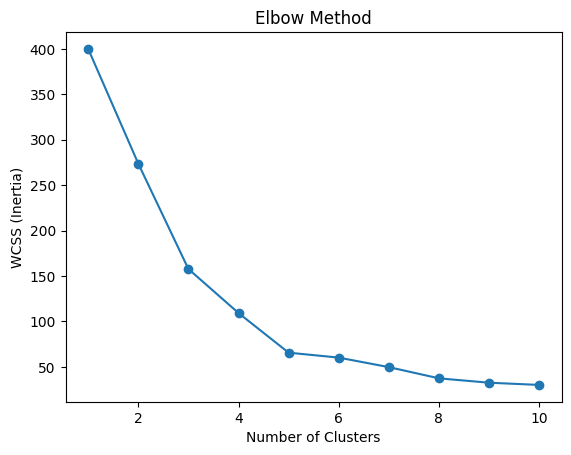

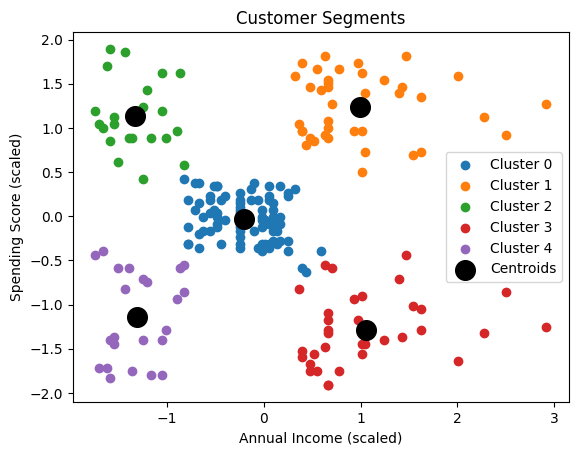

Segmented dataset saved as Segmented_Customers.csv


In [1]:
# Task 12: KMeans Customer Segmentation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Load Dataset
# -----------------------------
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

# -----------------------------
# Drop CustomerID column
# -----------------------------
df = df.drop("CustomerID", axis=1)

# Use Annual Income & Spending Score
X = df.iloc[:, [2, 3]].values

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Elbow Method
# -----------------------------
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

# -----------------------------
# Train KMeans (K = 5)
# -----------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

# -----------------------------
# Visualize Clusters
# -----------------------------
plt.figure()

plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], label="Cluster 0")
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], label="Cluster 1")
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], label="Cluster 2")
plt.scatter(X_scaled[clusters == 3, 0], X_scaled[clusters == 3, 1], label="Cluster 3")
plt.scatter(X_scaled[clusters == 4, 0], X_scaled[clusters == 4, 1], label="Cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=200, c='black', label="Centroids")

plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

# -----------------------------
# Save Segmented Dataset
# -----------------------------
df.to_csv("Segmented_Customers.csv", index=False)
print("Segmented dataset saved as Segmented_Customers.csv")